LINEAR REGRESION

Database from https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [8]:
!pip install -q sklearn

In [9]:
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc



In [10]:
dftrain= pd.read_csv('../datas/Titanic/train.csv')
dfeval= pd.read_csv('../datas/Titanic/test.csv')
print(dftrain.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500     0        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250     0        S  
3            113803  53.1000  C123        S  
4            373450   8.0500     0        S  


In [11]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


In [12]:
dftrain1=dftrain.drop(dftrain.columns[8],axis=1)
dftrain2=dftrain1.drop(dftrain.columns[10],axis=1)
dftrain3 = dftrain2.drop(dftrain.columns[11], axis=1)
dftrain3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500


In [13]:
dftrain3.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [14]:
dfeval1 = dfeval.drop(dftrain.columns[8], axis=1)
dfeval2 = dfeval1.drop(dftrain.columns[10], axis=1)
dfeval3 = dfeval2.drop(dftrain.columns[11], axis=1)
dfeval3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875


In [15]:
dfeval3.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [16]:
y_train=dftrain3.pop('Survived')
y_eval=dfeval3.pop('Survived')

<AxesSubplot:>

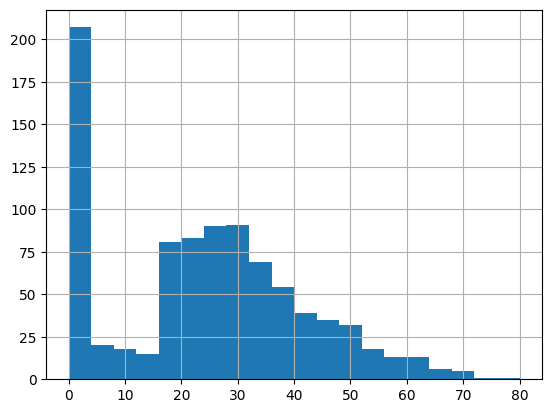

In [17]:
dftrain3.Age.hist(bins=20)


<AxesSubplot:>

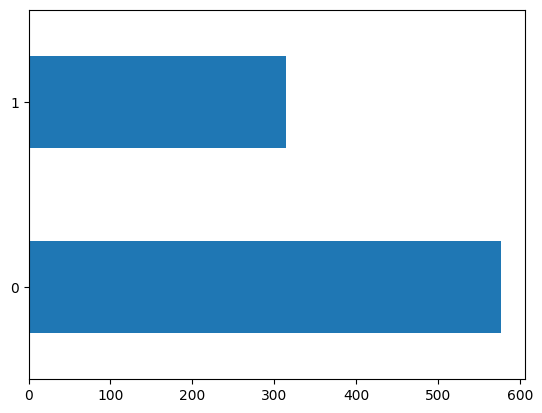

In [18]:
dftrain3.Sex.value_counts().plot(kind='barh')

<AxesSubplot:>

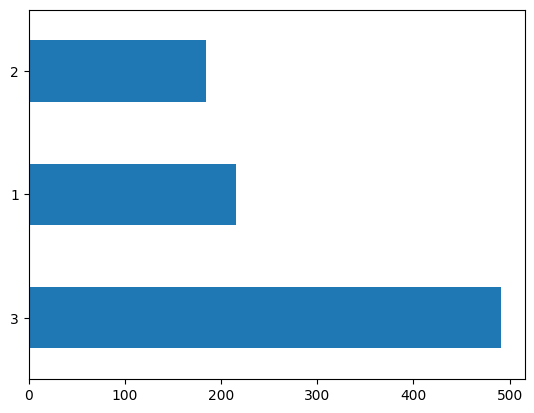

In [19]:
dftrain3['Pclass'].value_counts().plot(kind='barh')

Linear Regresion

In [20]:
categorical_columns=['Sex','SibSp','Parch','Pclass']
Numeric_Columns=['Age','Fare']

feature_columns=[]
for feature_name in categorical_columns:
    vocabulary=dftrain3[feature_name].unique()
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

for feature_name in Numeric_Columns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))
print(feature_columns) 


[NumericColumn(key='Sex', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Pclass', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [21]:
def make_input_fn(data_df,label_df,num_epoch=10,shuffle=True,batch_size=32):
    def input_function():
        ds =tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds= ds.shuffle(1000)
        ds =ds.batch(batch_size).repeat(num_epoch)
        return ds
    return input_function

train_input_fn= make_input_fn(dftrain3, y_train)
eval_input_fn=make_input_fn(dfeval3,y_eval,num_epoch=1,shuffle=False)







In [22]:
linear_est=tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpcaizcde4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
linear_est.train(train_input_fn)
result=linear_est.evaluate(eval_input_fn)

clear_output()


In [24]:

print(result['accuracy'])

0.9521531


In [25]:
result1=list(linear_est.predict(eval_input_fn))
print(result1[0]['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcaizcde4/model.ckpt-280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0.90191364 0.09808637]


Probability 1 means survived

In [26]:
result1 = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[4])
print(y_eval.loc[4])
print(result1[4]['probabilities'][1])


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpcaizcde4/model.ckpt-280
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
PassengerId                                             896
Survived                                                  1
Pclass                                                    3
Name           Hirvonen, Mrs. Alexander (Helga E Lindqvist)
Sex                                                       1
Age                                                    22.0
SibSp                                                     1
Parch                                                     1
Ticket                                              3101298
Fare                                                12.2875
Cabin                                                     0
Embarked                                                  S
Name: 4, dtyp